In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import os
os.chdir('../')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tfn.preprocess import Dataset
from tfn.feature_extraction.tf_idf import get_tfidf_model

In [2]:
data = Dataset('twitter')

X = np.concatenate((data.X_train, data.X_test))
Y = np.concatenate((data.y_train, data.y_test))

In [4]:
_, corpus_matrix, _ = get_tfidf_model(X)

# This takes a while
U, S, V = np.linalg.svd(corpus_matrix.toarray())

In [5]:
principle_dirs = V.T[:3]
data_principle = corpus_matrix.toarray() @ principle_dirs.T

In [6]:
def plot_scatter(X):
    colors = ['red', 'blue']
    target_names = [0, 1]
    
    data_df = pd.DataFrame(X)
    data_df['label'] = Y
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for target in target_names:
        d = data_df[data_df['label'] == target]
        ax.scatter(d[0], d[1], d[2], label=target)
        ax.legend(target_names)
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    '''
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(0.001)'''

<IPython.core.display.Javascript object>


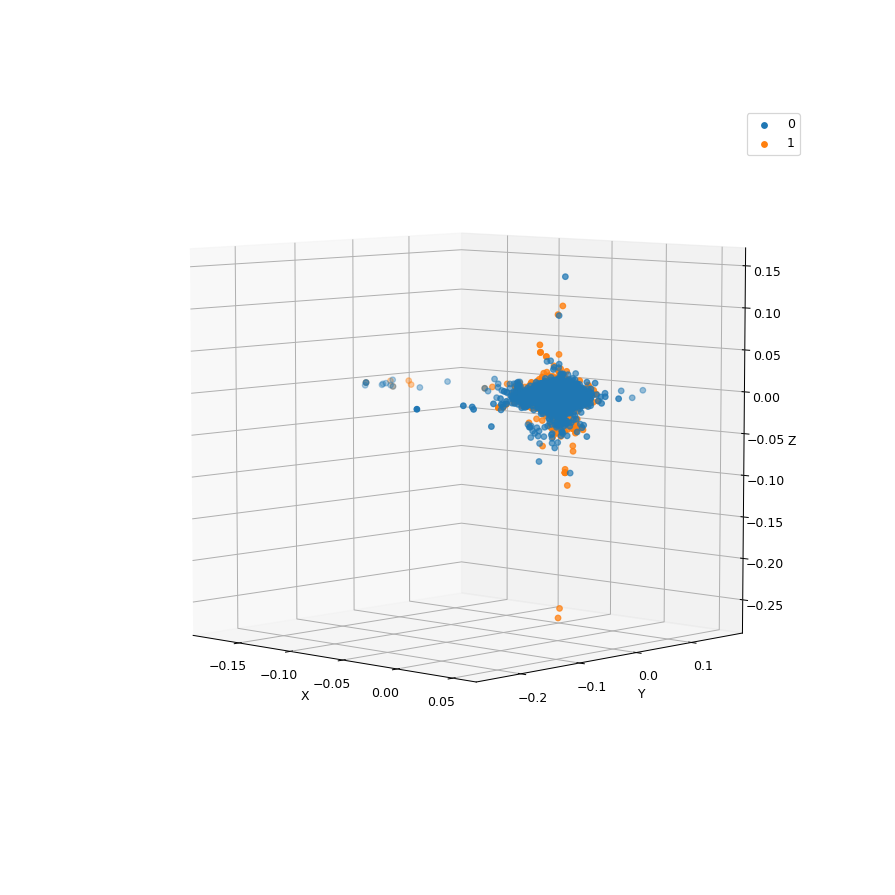

In [7]:
plot_scatter(data_principle)